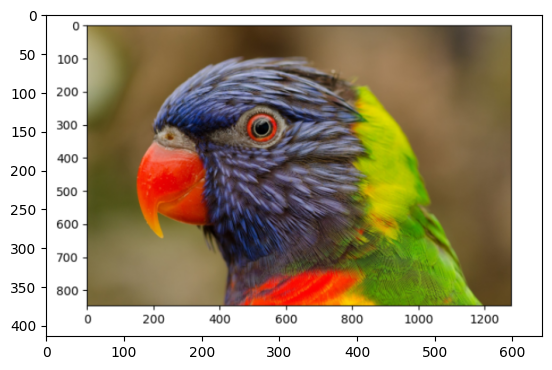

In [1]:
#Reading image through CV and Displaying through matplotlib and Opencv both
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread(r'C:\Users\medin\Desktop\Demo_OpenCV\1_qQbo4YRT32LfyXRWdR1irQ.png')
cv.imshow('Image', image)
cv.waitKey(0) #It opens the image new window until any key is pressed
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
 # prints image in the output below the Cell

Text(0.5, 1.0, 'Red Channel')

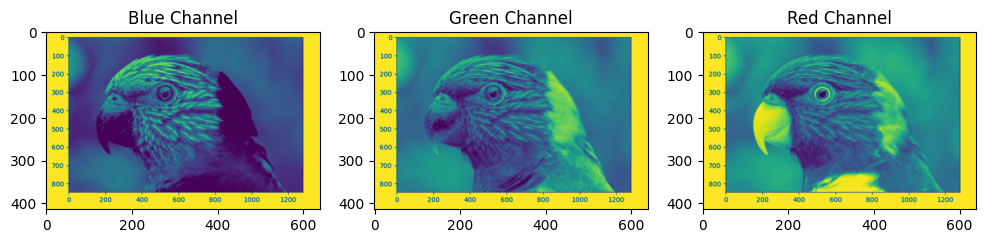

In [2]:
#Color Channels separation
b,g,r = cv.split(image)
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)      
plt.imshow(b)
plt.title('Blue Channel')
plt.subplot(1,3,2) 
plt.imshow(g)
plt.title('Green Channel')
plt.subplot(1,3,3)
plt.imshow(r)
plt.title('Red Channel')    

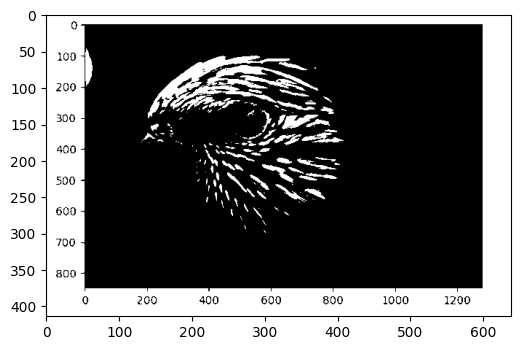

In [27]:
#blue channel thresholding
blue_thresh = cv.threshold(b,128,255,cv.THRESH_BINARY)[1]
plt.figure(figsize=(6,6))
plt.imshow(blue_thresh,cmap='gray') 

In [3]:
# gray conversion
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# plt.imshow(image_gray,cmap='gray')
cv.imshow('Gray Image', image_gray)
cv.waitKey(0)

-1

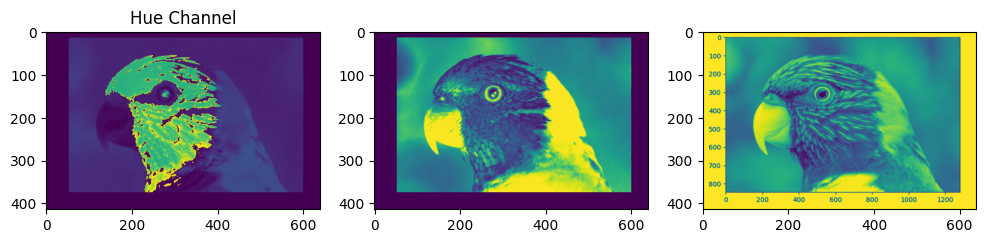

In [4]:
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
h,s,v = cv.split(image_hsv)
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)      
plt.imshow(h)
plt.title('Hue Channel')
plt.subplot(1,3,2)
plt.imshow(s)
plt.subplot(1,3,3)
plt.imshow(v)



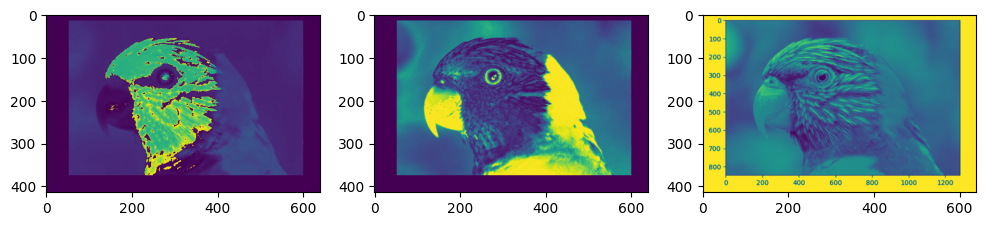

In [5]:
image_hsl = cv.cvtColor(image, cv.COLOR_BGR2HLS)
h,l,s = cv.split(image_hsl) 
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)  
plt.imshow(h)
plt.subplot(1,3,2)
plt.imshow(s)
plt.subplot(1,3,3)
plt.imshow(l)

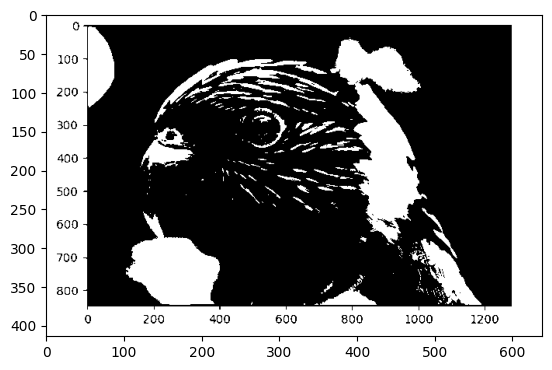

In [9]:
#thresholding Binary, binary inverse, trunc, tozero, tozero inverse
image_binary = cv.threshold(image_gray,128,255,cv.THRESH_BINARY)[1]
plt.imshow(image_binary,cmap='gray')

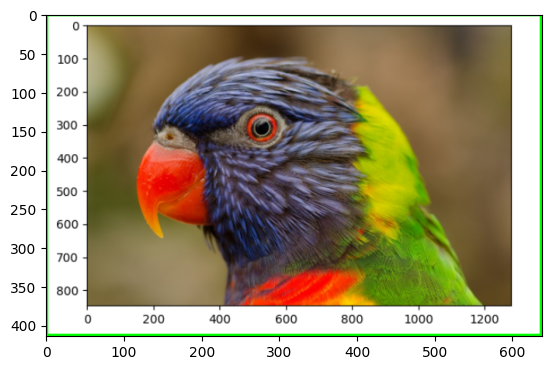

In [10]:
Countours = cv.findContours(image_binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)[0]
image_contours = image.copy()   
cv.drawContours(image_contours,Countours,-1,(0,255,0),3)
plt.imshow(cv.cvtColor(image_contours, cv.COLOR_BGR2RGB))   

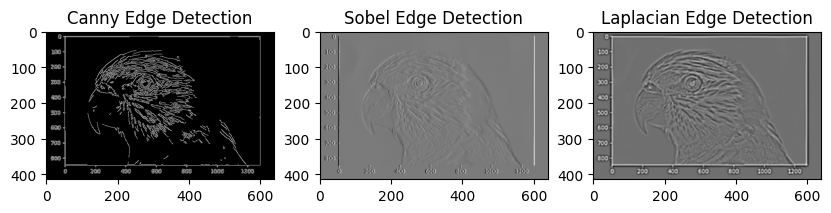

In [25]:
# edge detection - canny, sobel , laplacian
edges = cv.Canny(image_gray,100,200)
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)      
plt.title('Canny Edge Detection')
plt.imshow(edges,cmap='gray')
sobel_edge = cv.Sobel(image_gray,cv.CV_64F,1,0,ksize=5)
plt.subplot(1,3,2)      
plt.title('Sobel Edge Detection')
plt.imshow(sobel_edge,cmap='gray')
laplacian_edge = cv.Laplacian(image_gray,cv.CV_64F,ksize=21)
plt.subplot(1,3,3)      
plt.title('Laplacian Edge Detection')
plt.imshow(laplacian_edge,cmap='gray')

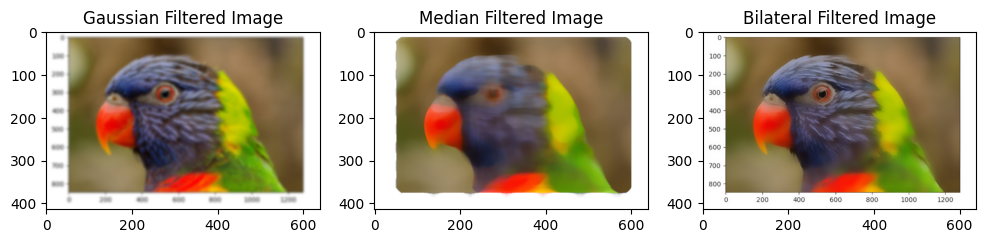

In [30]:
# Filtering - Gaussian, Median, Bilateral
image_gaussian = cv.GaussianBlur(image,(15,15),0)
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('Gaussian Filtered Image')
plt.imshow(cv.cvtColor(image_gaussian, cv.COLOR_BGR2RGB))
image_median = cv.medianBlur(image,25)
plt.subplot(1,3,2)
plt.title('Median Filtered Image')
plt.imshow(cv.cvtColor(image_median, cv.COLOR_BGR2RGB))
image_bilateral = cv.bilateralFilter(image,25,105,75)
plt.subplot(1,3,3)
plt.title('Bilateral Filtered Image')
plt.imshow(cv.cvtColor(image_bilateral, cv.COLOR_BGR2RGB))


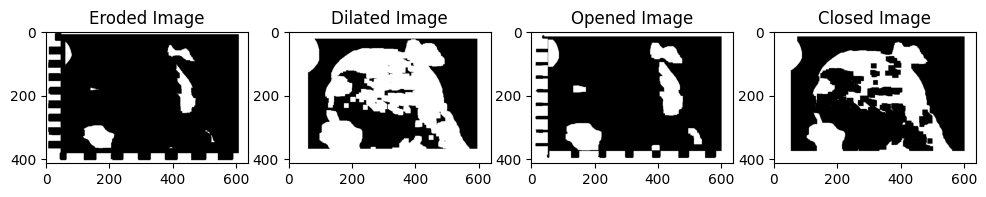

In [32]:
# Morphological Operations - Erosion, Dilation, Opening, Closing
kernel = cv.getStructuringElement(cv.MORPH_RECT,(15,15))
image_eroded = cv.erode(image_binary,kernel,iterations=1)
plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.title('Eroded Image')
plt.imshow(image_eroded,cmap='gray')
image_dilated = cv.dilate(image_binary,kernel,iterations=1)
plt.subplot(1,4,2)
plt.title('Dilated Image')
plt.imshow(image_dilated,cmap='gray')
image_opened = cv.morphologyEx(image_binary,cv.MORPH_OPEN,kernel)
plt.subplot(1,4,3)
plt.title('Opened Image')
plt.imshow(image_opened,cmap='gray')
image_closed = cv.morphologyEx(image_binary,cv.MORPH_CLOSE,kernel)
plt.subplot(1,4,4)
plt.title('Closed Image')
plt.imshow(image_closed,cmap='gray')

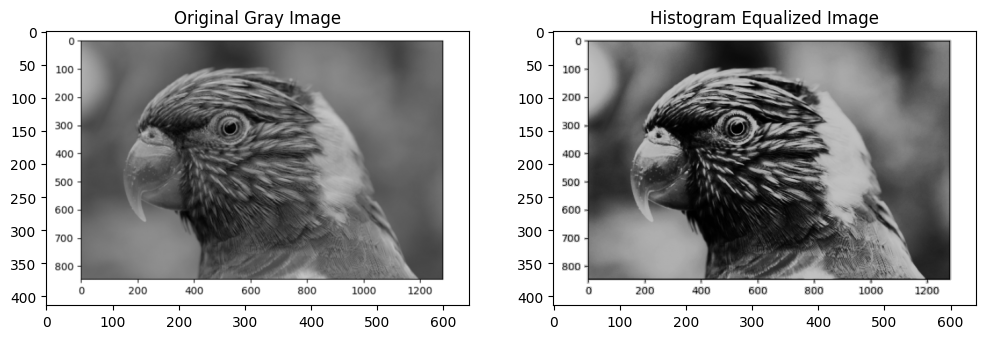

In [33]:
#Image enhacement - Histogram Equalization
image_gray_eq = cv.equalizeHist(image_gray)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Gray Image')
plt.imshow(image_gray,cmap='gray')
plt.subplot(1,2,2)
plt.title('Histogram Equalized Image')
plt.imshow(image_gray_eq,cmap='gray')


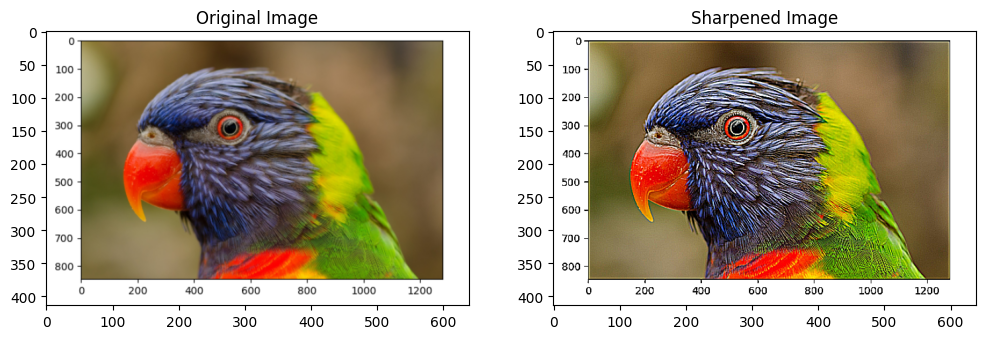

In [34]:
#Image sharpening
import numpy as np
kernel_sharpening = np.array([[-1,-1,-1],
                                [-1, 9,-1],
                                [-1,-1,-1]])
image_sharpened = cv.filter2D(image, -1, kernel_sharpening)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title('Sharpened Image')
plt.imshow(cv.cvtColor(image_sharpened, cv.COLOR_BGR2RGB))



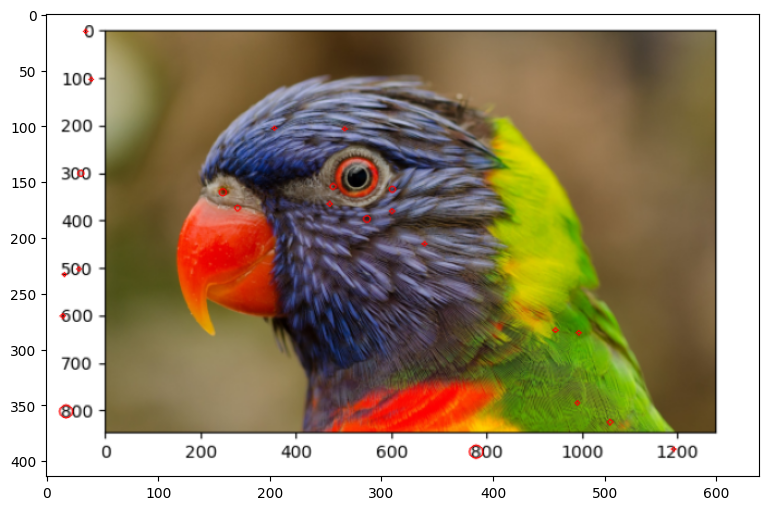

In [38]:
#Blob Detection
params = cv.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 10
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(image_gray)
image_with_keypoints = cv.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,6))
plt.imshow(cv.cvtColor(image_with_keypoints, cv.COLOR_BGR2RGB))



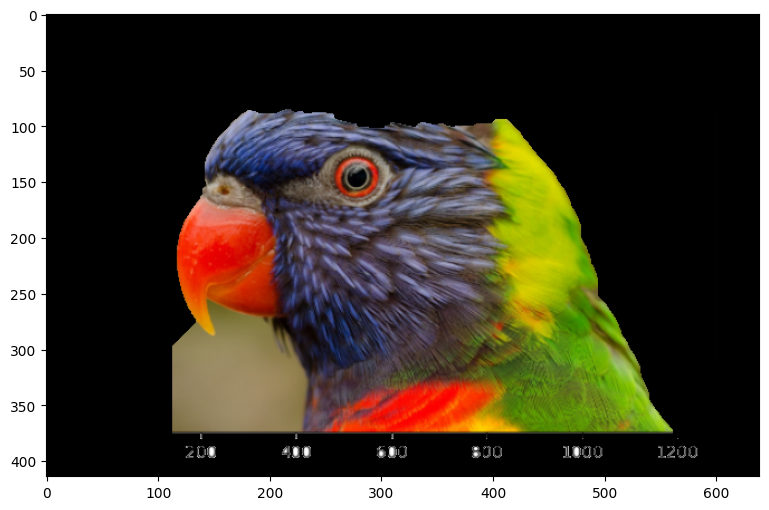

In [46]:
#segmentation - watershed, grabcut 

# Grab Cut Segmentation
mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (85,85,image.shape[1]-50,image.shape[0]-50)
cv.grabCut(image,mask,rect,bgdModel,fgdModel,5,
            cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image_grabcut = image*mask2[:,:,np.newaxis]
plt.figure(figsize=(10,6))
plt.imshow(cv.cvtColor(image_grabcut, cv.COLOR_BGR2RGB))
